# Trabalho Final

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('concrete.csv')
df.dropna(inplace=True)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Atributos e target
X = df[["cement", "slag", "ash", "water", "superplastic", "coarseagg", "fineagg", "age"]]
y = df["strength"]

# Split de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.04, random_state=10)

# Normalização
normalizador = StandardScaler()
X_treino_normalizado = normalizador.fit_transform(X_treino)
X_teste_normalizado = normalizador.transform(X_teste)

# Criação do modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(64, 50, 20),
                   activation='tanh',
                   solver='adam',
                   max_iter= 2000,
                   learning_rate_init=0.008,
                   random_state= 10)

# Treinamento
mlp.fit(X_treino_normalizado, y_treino)

# Predição do teste
y_pred = mlp.predict(X_teste_normalizado)

# Erro
mse = mean_squared_error(y_teste, y_pred)
print("RMSE", mse ** (1/2))

RMSE 2.880498342577468


Text(0.5, 1.0, 'Valor dos preços reais x preditos')

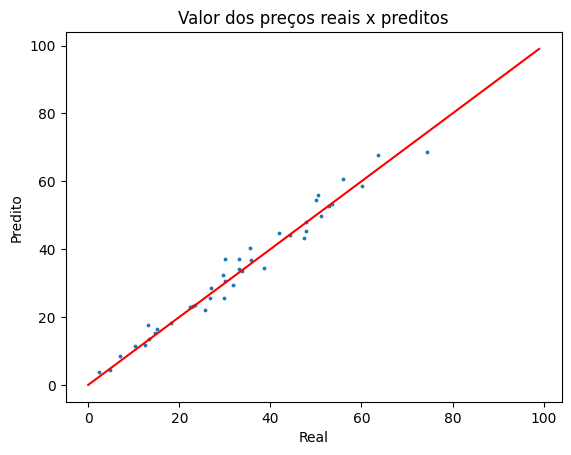

In [3]:
reta = []
for i in range(100):
    reta.append(i)

plt.scatter(y_teste, y_pred, s=3)
plt.plot(reta, reta, color='red')
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Valor dos preços reais x preditos')

In [4]:
import torch                                                #pytorch
import torch.nn as nn                                       #redes neurais
import torch.optim as optim                                 #otimização
import pandas as pd                                         #litura do csv
import matplotlib.pyplot as plt                             #Adicionado para plotagem
from sklearn.model_selection import train_test_split        #divide treino e teste
from sklearn.preprocessing import StandardScaler            #nornalização (dados-média/desvio)
from sklearn.model_selection import cross_val_score         #valiodação cruzada
from sklearn.metrics import make_scorer, mean_squared_error #análise da valodação cruzada

In [5]:
# Carregar os dados do CSV
data = pd.read_csv('concrete.csv')

In [6]:
# Separar features (X) e labels (y)
X = data.drop(columns=["cement", "slag", "ash", "water", "superplastic", "coarseagg", "fineagg", "age"])
y = data['strength']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Converter para tensores PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [7]:
# Definir a arquitetura da rede MLP
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()                   #função de ativação por tangente hiperbólica
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

In [8]:
# Parâmetros da rede
input_size = X_train.shape[1]
hidden_size = 128
output_size = len(y.unique())  # Número de classes

In [9]:
# Criar a rede
model = MLP(input_size, hidden_size, output_size)

In [10]:
# Definir a função de custo e o otimizador
criterion = nn.CrossEntropyLoss()                   #MSE sempre cai em um mínimo local prejudicial 
optimizer = optim.Adam(model.parameters(), lr=0.1) #otimizador Adam para maior convergêncoia

In [11]:
# Treinamento da rede
epochs = 300
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

Epoch [10/300], Loss: 3.960559606552124
Epoch [20/300], Loss: 2.6814663410186768
Epoch [30/300], Loss: 2.23140811920166
Epoch [40/300], Loss: 1.9582866430282593
Epoch [50/300], Loss: 1.7576994895935059
Epoch [60/300], Loss: 1.6052736043930054
Epoch [70/300], Loss: 1.4752447605133057
Epoch [80/300], Loss: 1.3681838512420654
Epoch [90/300], Loss: 1.3343708515167236
Epoch [100/300], Loss: 1.219475269317627
Epoch [110/300], Loss: 1.1545219421386719
Epoch [120/300], Loss: 1.1011507511138916
Epoch [130/300], Loss: 1.0420844554901123
Epoch [140/300], Loss: 0.9885553121566772
Epoch [150/300], Loss: 0.9445441365242004
Epoch [160/300], Loss: 0.9823633432388306
Epoch [170/300], Loss: 1.2448458671569824
Epoch [180/300], Loss: 1.1196502447128296
Epoch [190/300], Loss: 0.9327578544616699
Epoch [200/300], Loss: 0.9235053658485413
Epoch [210/300], Loss: 0.8866082429885864
Epoch [220/300], Loss: 0.9302186369895935
Epoch [230/300], Loss: 0.941674530506134
Epoch [240/300], Loss: 0.8547212481498718
Epoch 

In [12]:
# Avaliação do modelo
with torch.no_grad():
    model.eval()
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print(f'Acurácia do modelo: {accuracy}')

Acurácia do modelo: 0.7961165048543689


In [13]:
mse = mean_squared_error(y_test, predicted)
print("RMSE:", mse ** (1/2))

RMSE: 0.4827107920254778


### Código final:

**NOTA:** Devido a versão instalada do pandas, o código gera um aviso para cada rede iterada. Deixamos esse aviso, apenas por respresentação do código rodando, mas você pode retirar este aviso se remover o comentário do código presente na célula seguinte. Entretanto, cuidado! Este código irá remover TODOS os avisos possíveis.

Além disso, caso queira pular todo o código de aviso para ver a análise de dados, apenas feche o tópico "Rede geradora de `.csv`".

In [3]:
#import warnings
#warnings.filterwarnings('ignore')

## Rede geradora de `.csv`

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from itertools import product

# Carregar os dados do CSV
data = pd.read_csv('concrete.csv')


# Hiperparâmetros editáveis
DIC_ATIVACOES = {
    'ReLU' : nn.ReLU(),
    'Tanh' : nn.Tanh(),
    'Sigmoid': nn.Sigmoid(),
    'Softmax': nn.Softmax(),
    'GELU': nn.GELU()
}

random_state = 100                   # Definindo random_state como 100
lrs = [0.01, 0.02, 0.05, 0.1, 0.15]                         # Definindo diferentes taxas de aprendizado
epochs = [100, 150, 200]                       # Adicionando mais opções para número de épocas
hidden_sizes = [16, 32, 64, 128, 256]                  # Adicionando diferentes números de neurônios na camada oculta
dropout_prob = 0.5                   # Probabilidade de dropout
k_folds = 5                          # Número de folds para validação cruzada



# Separar atributos (X) e target (y)
X = data.drop(columns=["cement", "slag", "ash", "water", "superplastic", "coarseagg", "fineagg", "age"])
y = data['strength']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converter para tensores PyTorch
X = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)

# Dataframe para armazenar os resultados
results_df = pd.DataFrame(columns=['Folds number',
                                   'Fold', 
                                   'Random State',
                                   'Dropout probability', 
                                   'Activation function', 
                                   'Learning Rate', 
                                   'Epochs', 
                                   'Layers number', 
                                   'Hidden Size', 
                                   'RMSE'
                                  ])

# K-Fold Cross-Validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=random_state)

# Criar todas as combinações possíveis dos hiperparâmetros
hyperparameters_combinations = product(lrs, epochs, hidden_sizes, range(1, 5), DIC_ATIVACOES.items())

# Loop pelos hiperparâmetros
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Dividir os dados em conjuntos de treinamento e teste para o fold atual
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for lr, num_epochs, hidden_size, num_layers, (ativacao_name, ATIVACAO) in hyperparameters_combinations:
        # Definir a classe da rede MLP
        class MLP(nn.Module):
            def __init__(self, input_size, hidden_size, output_size, num_layers, dropout_prob=dropout_prob): 
                super(MLP, self).__init__()
                self.layers = nn.ModuleList()
                self.layers.append(nn.Linear(input_size, hidden_size))

                for _ in range(num_layers):
                    self.layers.append(nn.Linear(hidden_size, hidden_size))
                    self.layers.append(nn.Dropout(dropout_prob))  # Adicionando Dropout

                self.layers.append(nn.Linear(hidden_size, output_size))
                self.activation = ATIVACAO

            def forward(self, x):
                for layer in self.layers[:-1]:
                    x = self.activation(layer(x))
                x = self.layers[-1](x)
                return x

        # Parâmetros da rede
        input_size = X_train.shape[1]
        output_size = 1  # Problema de regressão

        # Criar a rede
        model = MLP(input_size, hidden_size, output_size, num_layers, dropout_prob)

        # Definir a função de custo e o otimizador
        criterion = nn.MSELoss()  # Mudando para MSELoss já que é uma tarefa de regressão
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Treinamento da rede
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs.squeeze(), y_train)
            loss.backward()
            optimizer.step()

        # Avaliação do modelo
        model.eval()
        with torch.no_grad():
            outputs = model(X_test).squeeze()
            mse = mean_squared_error(y_test, outputs)
            RMSE = np.sqrt(mse)

        # Armazenar os resultados
        results_df = results_df.append({'Folds number': k_folds,
                                        'Fold': fold + 1,
                                        'Random State': random_state,
                                        'Dropout probability': dropout_prob,
                                        'Activation function': ativacao_name, 
                                        'Learning Rate': lr,
                                        'Epochs': num_epochs, 
                                        'Layers number': num_layers,
                                        'Hidden Size': hidden_size,
                                        'RMSE': RMSE,
                                    }, ignore_index=True)

# Salvar os resultados em um arquivo CSV
results_df.to_csv('results3.csv', index=False)

/tmp/ipykernel_3095452/2750539514.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Folds number': k_folds,
/tmp/ipykernel_3095452/2750539514.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Folds number': k_folds,
/tmp/ipykernel_3095452/2750539514.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Folds number': k_folds,
/home/sergio23040/anaconda3/envs/ilumpy/lib/python3.11/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/tmp/ipykernel_3095452/2750539514

## Análise dos hiperparâmetros:

In [12]:
# Encontrar a linha com a melhor acurácia
best_params = results_df.loc[results_df['RMSE'].idxmin()]

print("Melhores parâmetros de RMSE:")
print(best_params)

# Encontrar a linha com a pior acurácia
worst_params = results_df.loc[results_df['RMSE'].idxmax()]

print("\nPiores parâmetros de RMSE:")
print(worst_params)

# Calcular a média das acurácias
mean_accuracy = results_df['RMSE'].mean()

print("\nMédia total de RMSE:", mean_accuracy)

# Calcular a média das acurácias para cada valor de aprendizagem
mean_accuracy_lr = results_df.groupby('Learning Rate')['RMSE'].mean()

print("\nMédia de RMSE para cada valor de aprendizagem:")
print(mean_accuracy_lr)

# Calcular a média das acurácias para cada número de épocas
mean_accuracy_epochs = results_df.groupby('Epochs')['RMSE'].mean()

print("\nMédia de RMSE para cada número de épocas:")
print(mean_accuracy_epochs)

# Calcular a média das acurácias para cada tamanho de camada interna
mean_accuracy_hidden_size = results_df.groupby('Hidden Size')['RMSE'].mean()

print("\nMédia do RMSE para cada tamanho de camada interna:")
print(mean_accuracy_hidden_size)

Melhores parâmetros de RMSE:
Folds number                  5
Fold                          1
Random State                100
Dropout probability         0.5
Activation function        ReLU
Learning Rate              0.05
Epochs                      200
Layers number                 1
Hidden Size                 256
RMSE                   0.106414
Name: 880, dtype: object

Piores parâmetros de RMSE:
Folds number                   5
Fold                           1
Random State                 100
Dropout probability          0.5
Activation function         ReLU
Learning Rate               0.15
Epochs                       100
Layers number                  4
Hidden Size                  256
RMSE                   40.504681
Name: 1295, dtype: object

Média total de RMSE: 16.9328

Média de RMSE para cada valor de aprendizagem:
Learning Rate
0.01    17.091400
0.02    16.867575
0.05    17.103926
0.10    16.721659
0.15    16.879442
Name: RMSE, dtype: float32

Média de RMSE para cada número d

## Referências

- presentes no github deste documento